<a href="https://colab.research.google.com/github/dinzie95/Analyzing-User-behavior-Data-from-an-Online-Cosmetic-Store/blob/main/Basic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Read 5 csv files to a single dataframe
import pandas as pd

import glob

path = r'/content/gdrive/My Drive/Big Data Assignment 2/Datasets' 

all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:

    df_temp = pd.read_csv(filename, index_col=None, header=0)

    li.append(df_temp)

df_main = pd.concat(li, axis=0, ignore_index=True)



In [3]:
df_main.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-01-01 00:00:00 UTC,view,5809910,1602943681873052386,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a
1,2020-01-01 00:00:09 UTC,view,5812943,1487580012121948301,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a
2,2020-01-01 00:00:19 UTC,view,5798924,1783999068867920626,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3
3,2020-01-01 00:00:24 UTC,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711
4,2020-01-01 00:00:25 UTC,view,5899926,2115334439910245200,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb


In [4]:
#selecting needed columns and creating a dataframe
df_main = df_main[['event_time', 'event_type', 'brand','price','user_id']].copy()

In [5]:
#Sepaparate dataframes for views and purchases
df_purchase = df_main[df_main['event_type']=="purchase"]
df_view = df_main[df_main['event_type']=="view"]


### **Creating Date, Hour, Day of Week and Day of Month columns for Purchase data**

In [6]:
df_purchase.event_time[:1].str.slice(-3)

60    UTC
Name: event_time, dtype: object

In [7]:

year=  df_purchase.event_time.str.slice(0,4)
month = df_purchase.event_time.str.slice(5,7)
day = df_purchase.event_time.str.slice(8,10)


In [8]:
time = df_purchase.event_time.str.slice(10,-3).str.strip()
time_zone = df_purchase.event_time.str.slice(-3).str.strip()

In [9]:
hr = time.str.slice(0,2).str.strip()
min = time.str.slice(3,5).str.strip()
sec= time.str.slice(6).str.strip()


In [10]:
#zfill adds zeros to front until size become 2
month = month.str.zfill(2)
day =day.str.zfill(2)

In [11]:
hr = hr.str.zfill(2)
min=min.str.zfill(2)
sec= sec.str.zfill(2)

In [12]:
date_df = pd.DataFrame({'year':year,'month':month,'day':day})
date = date_df.astype(str).apply("-".join,axis=1)

In [13]:
time_df = pd.DataFrame({'hr':hr,'min':min,'sec':sec})
time = time_df.astype(str).apply(":".join,axis=1)

In [15]:
df_purchase['Date'] = date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_purchase['time'] = time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_purchase['month'] = month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_purchase['day_of_month'] = day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df_purchase['Date'] = pd.to_datetime(df_purchase['Date'], format="%Y-%m-%d")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_purchase['day_of_week'] = df_purchase['Date'].dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_purchase['hr'] = pd.to_datetime(df_purchase['time'], format="%H:%M:%S").dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_purchase.set_index('Date', inplace=True, drop=True)

In [23]:
df_purchase.drop(['event_time','time'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
df_purchase.tail()

,event_type,brand,price,user_id,month,day_of_month,day_of_week,hr
Date,,,,,,,,
2019-12-31,purchase,italwax,7.94,594500438,12,31,1,23
2019-12-31,purchase,shik,5.71,594500438,12,31,1,23
2019-12-31,purchase,NaN,10.95,595413503,12,31,1,23
2019-12-31,purchase,ingarden,4.92,231690364,12,31,1,23
2019-12-31,purchase,NaN,9.52,231690364,12,31,1,23


## **Analysis**

In [25]:
import numpy as np
import matplotlib.pyplot as plt

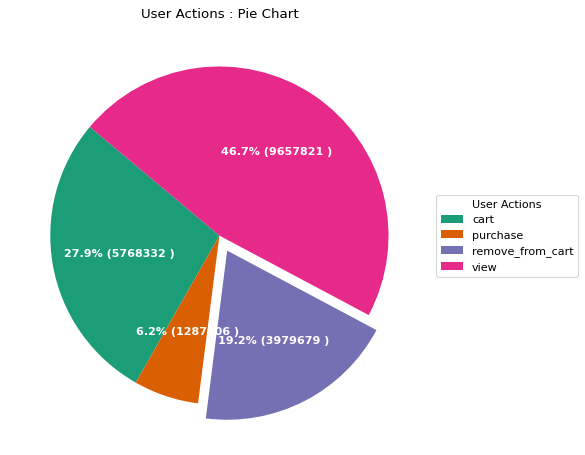

In [50]:
#User Actions Graph


df1 = df_main.groupby('event_type').size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df1['counts']
categories = df1['event_type']
explode = [0,0,0.1,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="User Actions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("User Actions : Pie Chart")
plt.show()

In [27]:
df_main.event_type.unique()

array(['view', 'cart', 'remove_from_cart', 'purchase'], dtype=object)

In [28]:
df_purchase.head()

,event_type,brand,price,user_id,month,day_of_month,day_of_week,hr
Date,,,,,,,,
2020-01-01,purchase,NaN,2.16,595411904,01,01,2,0
2020-01-01,purchase,kiss,7.92,595411904,01,01,2,0
2020-01-01,purchase,NaN,14.51,595351517,01,01,2,0
2020-01-01,purchase,cnd,19.37,287758725,01,01,2,0
2020-01-01,purchase,NaN,10.95,504269664,01,01,2,0


In [29]:
df_view.head()

,event_time,event_type,brand,price,user_id
0,2020-01-01 00:00:00 UTC,view,grattol,5.24,595414620
1,2020-01-01 00:00:09 UTC,view,kinetics,3.97,595414640
2,2020-01-01 00:00:19 UTC,view,zinger,3.97,595412617
3,2020-01-01 00:00:24 UTC,view,NaN,4.92,420652863
4,2020-01-01 00:00:25 UTC,view,NaN,3.92,484071203


In [30]:
df_main.brand.nunique()

273

In [31]:
df_purchase.brand.nunique()

250

In [32]:
df_view.brand.nunique()

273

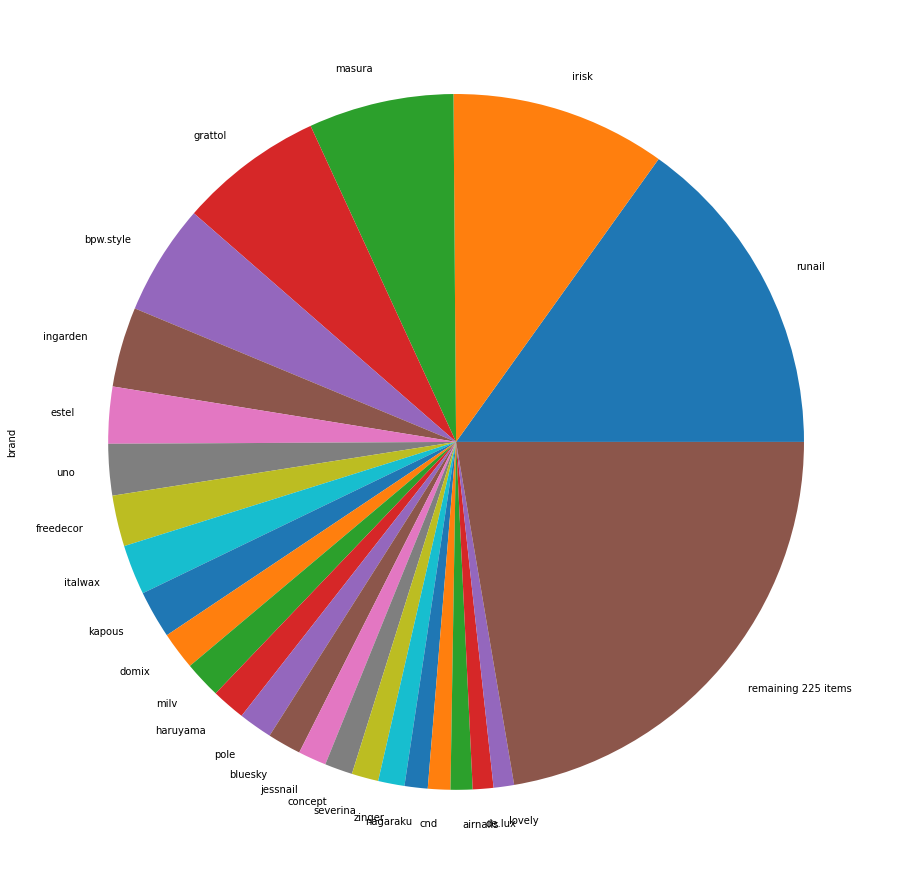

In [33]:
#Brand distribution of purchases

temp1 = df_purchase.brand.value_counts()
purchase_top_25 = temp1.head(25)
if len(temp1) > 25:
    purchase_top_25['remaining {0} items'.format(len(temp1) - 25)] = sum(temp1[25:])
purchase_top_25.plot(kind='pie',figsize=(16, 16))

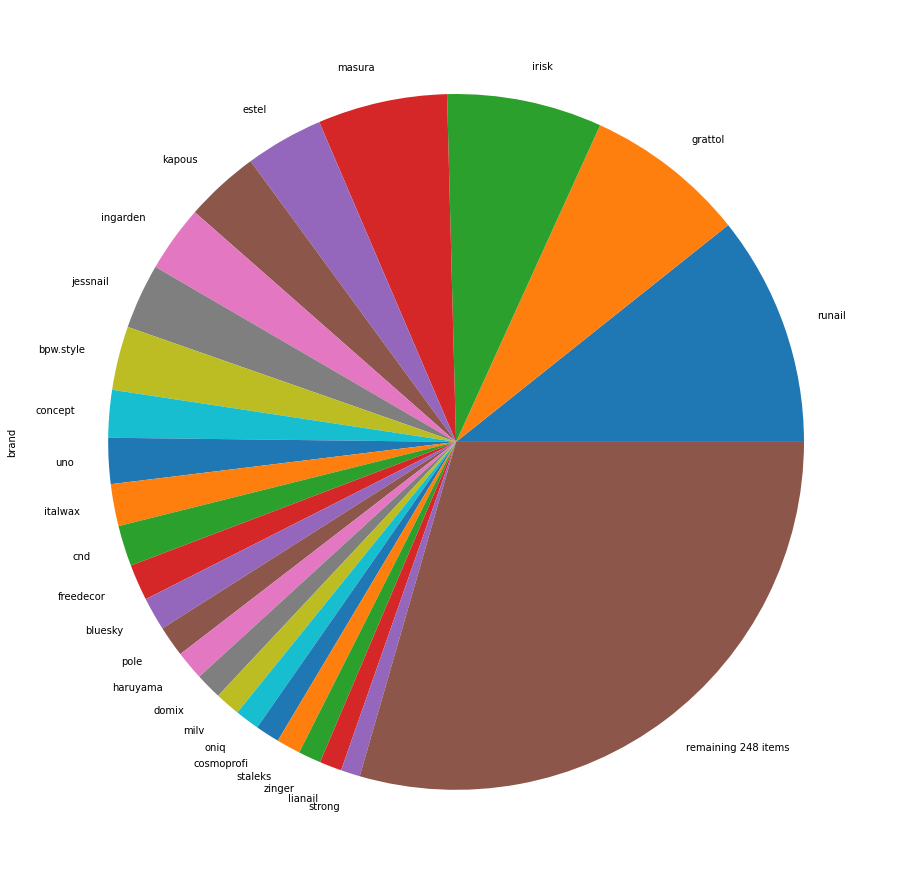

In [34]:
#Brand distribution of views

temp2 = df_view.brand.value_counts()
view_top_25 = temp2.head(25)
if len(temp2) > 25:
    view_top_25['remaining {0} items'.format(len(temp2) - 25)] = sum(temp2[25:])
view_top_25.plot(kind='pie',figsize=(16, 16))

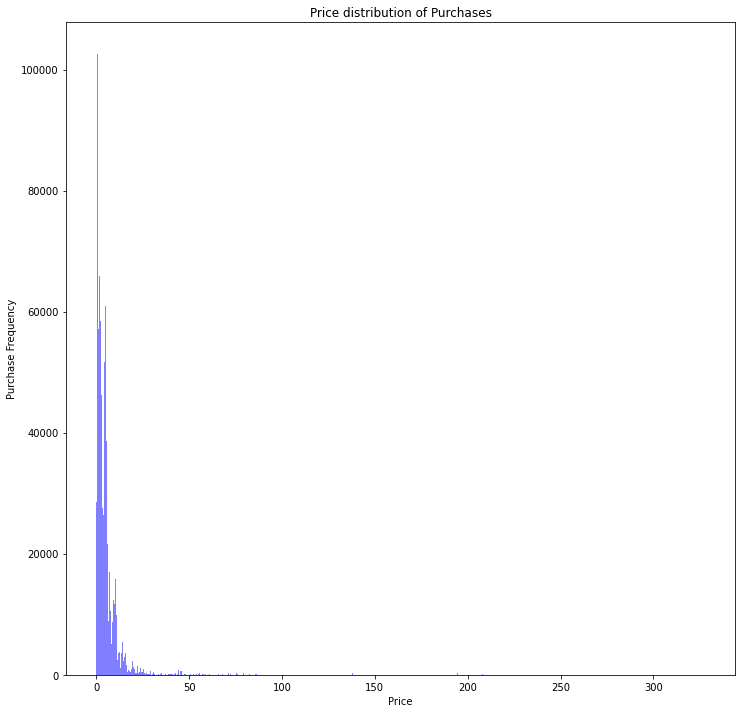

In [35]:
#Price distribution of Purchases

df_purchase = df_purchase[df_purchase['price']>= 0]

num_bins = 1000
plt.figure(figsize=(12,12))
plt.title('Price distribution of Purchases')
plt.xlabel('Price')
plt.ylabel('Purchase Frequency')
n, bins, patches = plt.hist(df_purchase.price, num_bins, facecolor='blue', alpha=0.5)
plt.show()

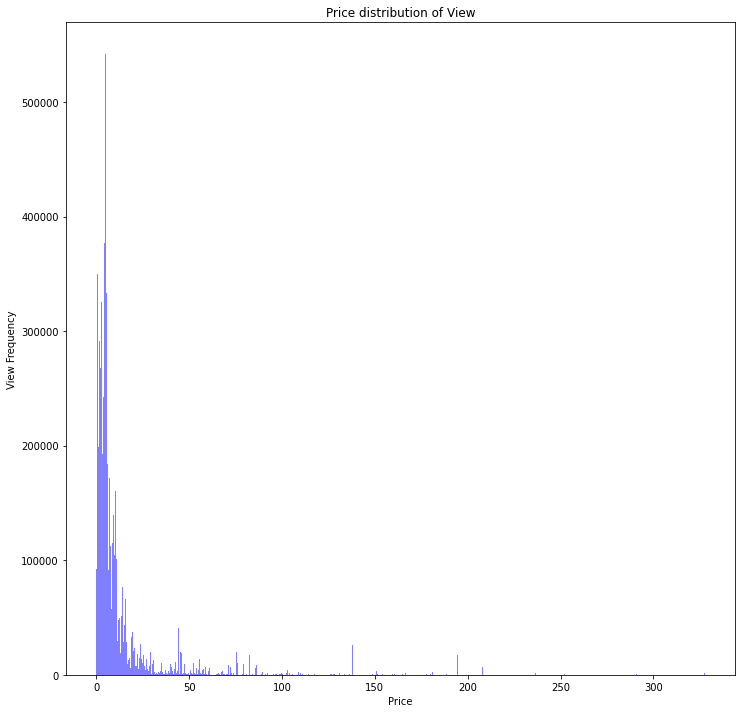

In [36]:
#Price distribution of View

df_view = df_view[df_view['price']>= 0]

num_bins = 1000
plt.figure(figsize=(12,12))
plt.title('Price distribution of View')
plt.xlabel('Price')
plt.ylabel('View Frequency')
n, bins, patches = plt.hist(df_view.price, num_bins, facecolor='blue', alpha=0.5)
plt.show()

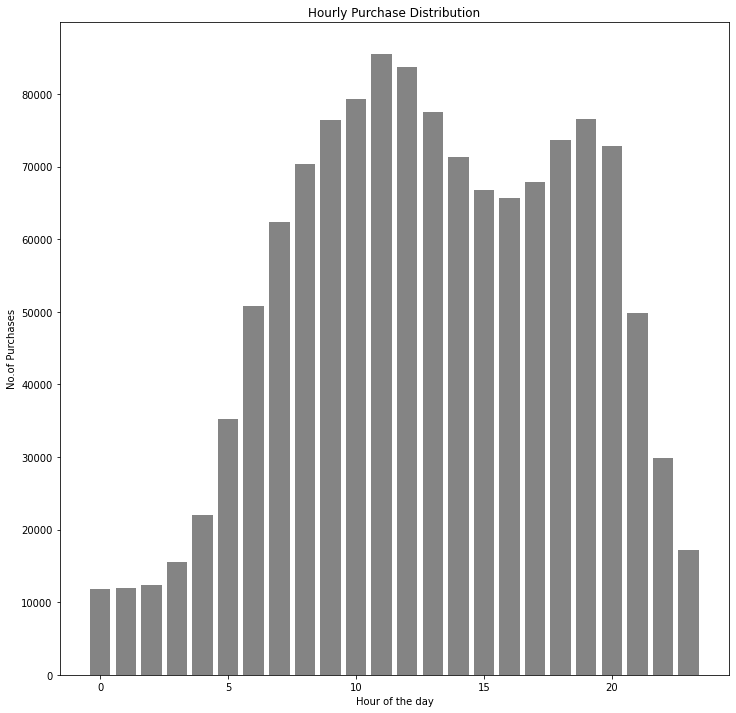

In [37]:
#Hourly purchase distribution

grp_by_hr_purchase = df_purchase.groupby('hr').size().reset_index(name='counts')

plt.figure(figsize=(12,12))
plt.bar(grp_by_hr_purchase['hr'],grp_by_hr_purchase['counts'],color=(0.2,0.2,0.2,0.6))
plt.xlabel('Hour of the day')
plt.ylabel("No.of Purchases")
plt.title('Hourly Purchase Distribution')
plt.show()

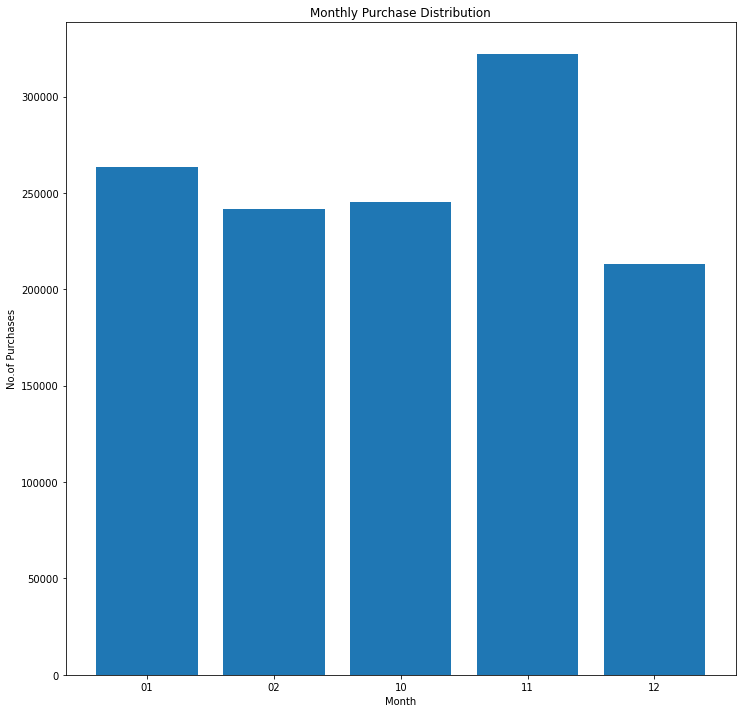

In [38]:
#Monthly purchase distribution

grp_by_month_purchase = df_purchase.groupby('month').size().reset_index(name='counts')

plt.figure(figsize=(12,12))
plt.bar(grp_by_month_purchase['month'],grp_by_month_purchase['counts'])
plt.xlabel('Month')
plt.ylabel("No.of Purchases")
plt.title('Monthly Purchase Distribution')
plt.show()

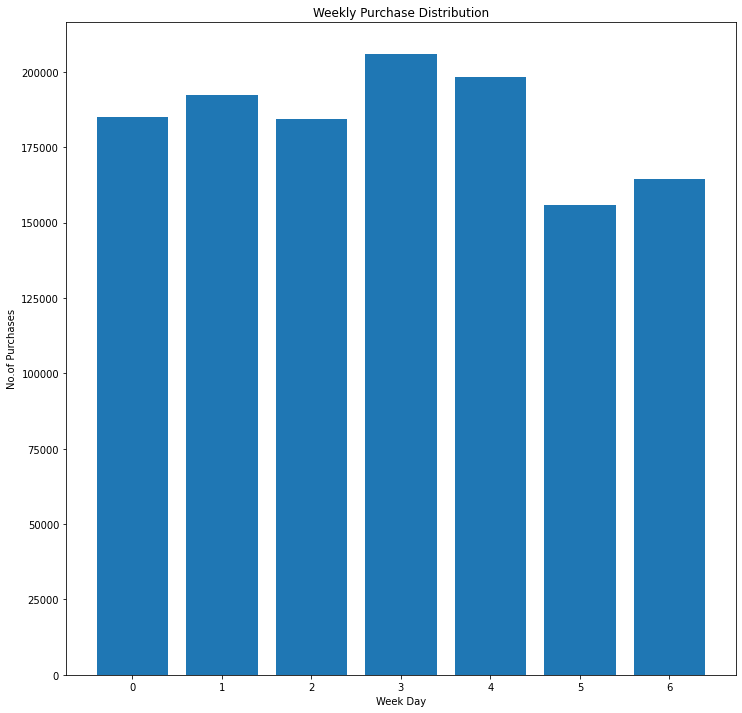

In [39]:
#Weekly purchase distribution

grp_by_week_purchase = df_purchase.groupby('day_of_week').size().reset_index(name='counts')

plt.figure(figsize=(12,12))
plt.bar(grp_by_week_purchase['day_of_week'],grp_by_week_purchase['counts'])
plt.xlabel('Week Day')
plt.ylabel("No.of Purchases")
plt.title('Weekly Purchase Distribution')
plt.show()

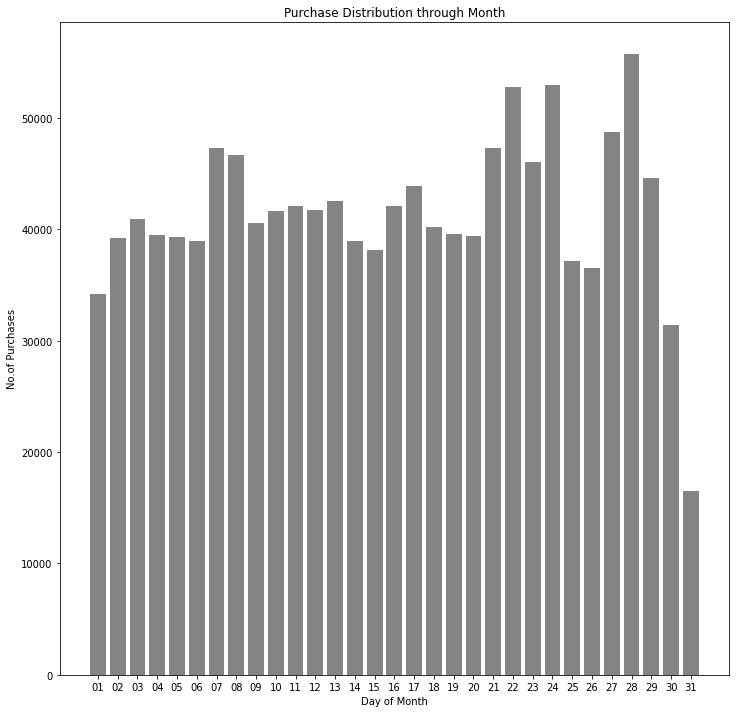

In [40]:
#Purchase distribution per day of month

grp_by_day_purchase = df_purchase.groupby('day_of_month').size().reset_index(name='counts')

plt.figure(figsize=(12,12))
plt.bar(grp_by_day_purchase['day_of_month'],grp_by_day_purchase['counts'],color=(0.2,0.2,0.2,0.6))
plt.xlabel('Day of Month')
plt.ylabel("No.of Purchases")
plt.title('Purchase Distribution through Month')
plt.show()

In [51]:
#Find top 10 users
grp_by_user = df_main.groupby('user_id').size().reset_index(name='counts')
grp_by_user.sort_values(by=['counts'],ascending=False)
grp_by_user.sort_values('counts').tail(10)

,user_id,counts
229928,506877330,6909
391614,552908674,7419
377367,550388516,7556
505313,557956487,7735
147504,467810091,8066
165553,476450673,8122
81834,419558969,8283
985991,583884978,9420
494091,557616099,9903
281608,527021202,26752


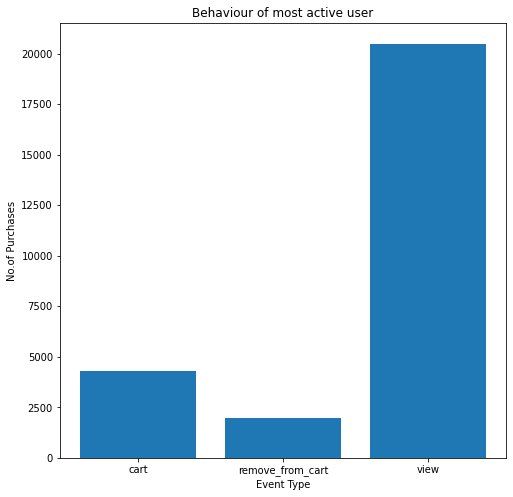

In [43]:
top_user_df=df_main.loc[df_main['user_id'] == 527021202	]
top_user= top_user_df.groupby('event_type').size().reset_index(name='counts')

plt.figure(figsize=(8,8))
plt.bar(top_user['event_type'],top_user['counts'])
plt.xlabel('Event Type')
plt.ylabel("No.of Purchases")
plt.title('Behaviour of most active user')
plt.show()

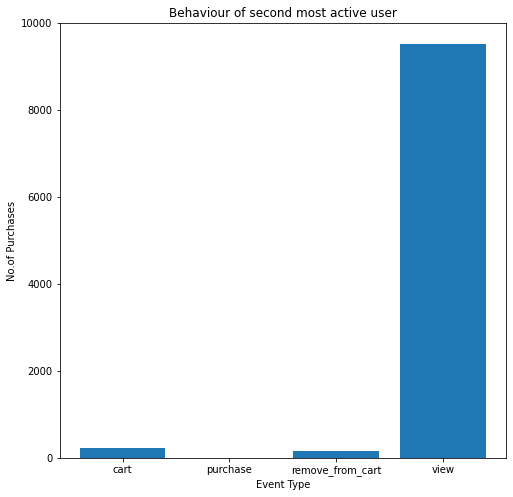

In [44]:
second_top_user_df=df_main.loc[df_main['user_id'] == 557616099	]
second_top_user= second_top_user_df.groupby('event_type').size().reset_index(name='counts')

plt.figure(figsize=(8,8))
plt.bar(second_top_user['event_type'],second_top_user['counts'])
plt.xlabel('Event Type')
plt.ylabel("No.of Purchases")
plt.title('Behaviour of second most active user')
plt.show()

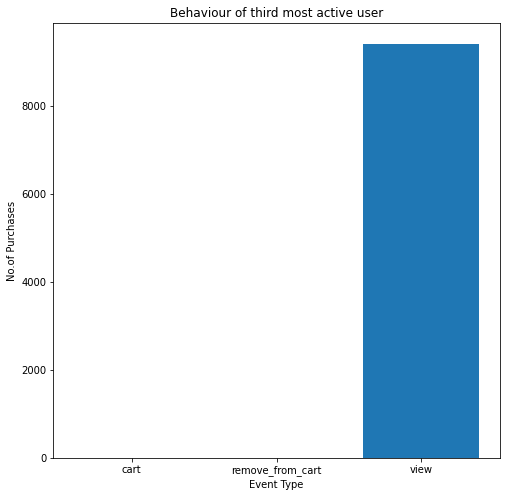

In [45]:
third_top_user_df=df_main.loc[df_main['user_id'] == 583884978	]
third_top_user= third_top_user_df.groupby('event_type').size().reset_index(name='counts')

plt.figure(figsize=(8,8))
plt.bar(third_top_user['event_type'],third_top_user['counts'])
plt.xlabel('Event Type')
plt.ylabel("No.of Purchases")
plt.title('Behaviour of third most active user')
plt.show()

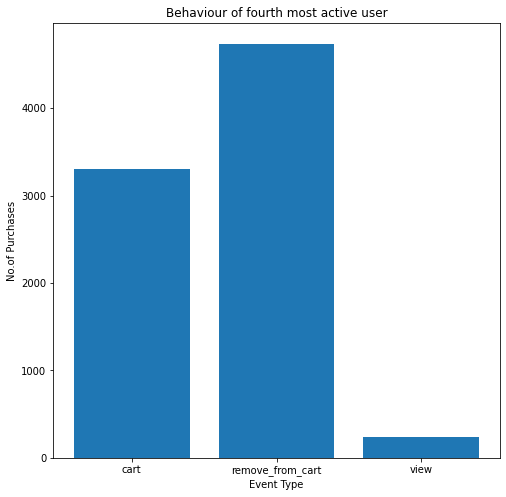

In [46]:
fourth_top_user_df=df_main.loc[df_main['user_id'] == 419558969	]
fourth_top_user= fourth_top_user_df.groupby('event_type').size().reset_index(name='counts')

plt.figure(figsize=(8,8))
plt.bar(fourth_top_user['event_type'],fourth_top_user['counts'])
plt.xlabel('Event Type')
plt.ylabel("No.of Purchases")
plt.title('Behaviour of fourth most active user')
plt.show()

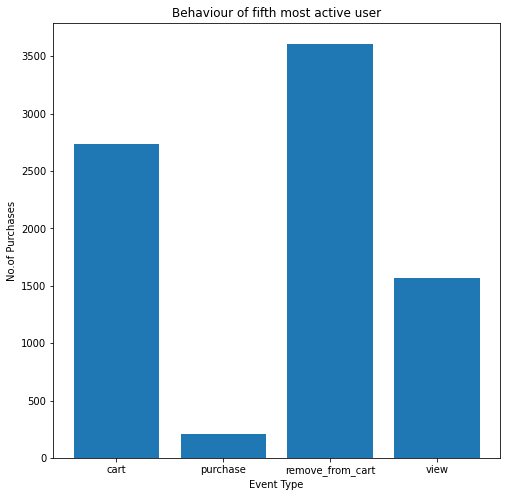

In [47]:
fifth_top_user_df=df_main.loc[df_main['user_id'] == 476450673	]
fifth_top_user= fifth_top_user_df.groupby('event_type').size().reset_index(name='counts')

plt.figure(figsize=(8,8))
plt.bar(fifth_top_user['event_type'],fifth_top_user['counts'])
plt.xlabel('Event Type')
plt.ylabel("No.of Purchases")
plt.title('Behaviour of fifth most active user')
plt.show()

In [48]:
top_three_df=df_main.loc[df_main['user_id'].isin([583884978, 557616099, 527021202])]
top_three_df.head()

,event_time,event_type,brand,price,user_id
14157,2020-01-01 10:06:07 UTC,view,trind,9.37,583884978
41600,2020-01-01 16:03:43 UTC,view,trind,9.37,583884978
41611,2020-01-01 16:03:54 UTC,view,trind,12.98,583884978
67382,2020-01-01 20:31:31 UTC,view,trind,9.37,583884978
67393,2020-01-01 20:31:38 UTC,view,trind,12.98,583884978


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


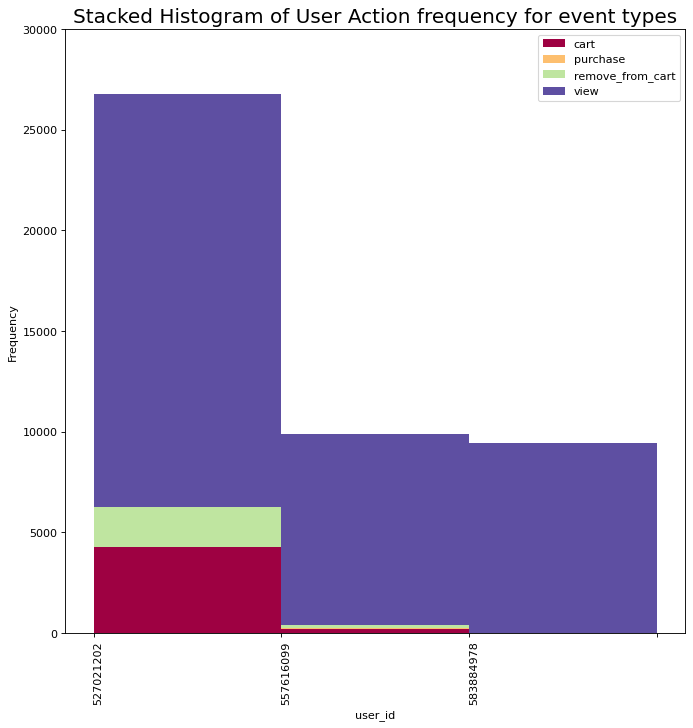

In [49]:
#Stacked histogram of user actions - Top 3 users
x_var = 'user_id'
groupby_var = 'event_type'
df_agg = top_three_df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [top_three_df[x_var].values.tolist() for i, top_three_df in df_agg]


plt.figure(figsize=(10,10), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, top_three_df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])


plt.legend({group:col for group, col in zip(np.unique(top_three_df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of User Action frequency for event types", fontsize=18)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 30000)
plt.xticks(ticks=bins, labels=np.unique(top_three_df[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()